E-Commerce Company supply chain analysis project

In [88]:
# import the libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import plotly.colors as colors

pio.templates.default="plotly_white"

In [90]:
data=pd.read_csv("processed_data.csv")

In [92]:
data

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
3,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
4,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,cosmetics,SKU91,62.111965,90,916,1935.206794,Male,98,22,85,...,Delhi,5,207,28,39.772883,Pending,0.626002,Rail,Route B,996.778315
65,cosmetics,SKU92,47.714233,44,276,2100.129755,Male,90,25,10,...,Mumbai,4,671,29,62.612690,Pass,0.333432,Rail,Route B,230.092783
66,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
67,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423


In [94]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
3,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
4,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237


In [96]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,46.346489,49.333333,447.652174,5862.531665,47.072464,16.101449,48.289855,5.739130,5.368994,16.739130,561.884058,14.695652,47.870259,2.204033,539.848702
std,31.131688,30.666933,311.240678,2637.505596,31.261854,8.687626,27.041962,2.693413,2.587881,8.889273,268.936989,8.850564,30.074210,1.482080,264.879919
min,1.699976,1.000000,24.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.000000,1.085069,0.021170,103.916248
25%,17.028028,26.000000,163.000000,2925.675170,17.000000,8.000000,26.000000,3.000000,3.404734,10.000000,329.000000,7.000000,22.554107,0.965395,323.012928
50%,46.529168,52.000000,380.000000,6099.944116,46.000000,17.000000,52.000000,6.000000,5.215155,18.000000,564.000000,13.000000,46.279879,2.078751,547.241005
75%,75.270407,75.000000,705.000000,8232.334829,69.000000,23.000000,69.000000,8.000000,7.471514,25.000000,806.000000,23.000000,69.929346,3.448063,768.651914
max,99.171329,98.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.898141,30.000000,985.000000,30.000000,99.466109,4.939255,997.413450


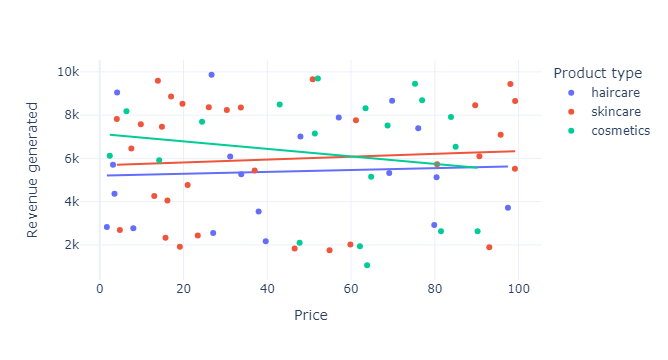

In [98]:
fig = px.scatter(data,x='Price',y='Revenue generated',color='Product type',hover_data=['Number of products sold'],trendline="ols")
fig.show()

In [99]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
3,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
4,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237


In [102]:
sales_data=data.groupby('Product type')['Number of products sold'].sum().reset_index()

In [104]:
sales_data

,Product type,Number of products sold
0,cosmetics,8923
1,haircare,6048
2,skincare,15917


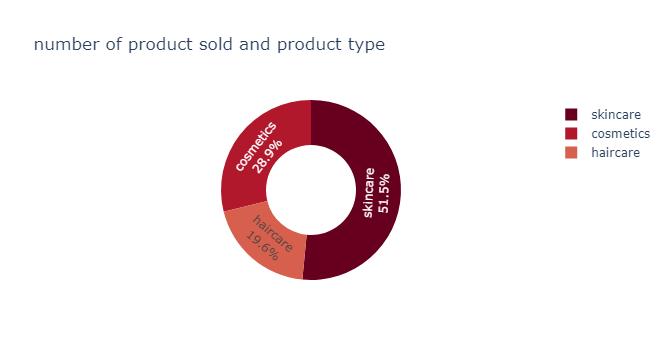

In [106]:

pie_chart= px.pie(sales_data, 
             names='Product type', 
             values='Number of products sold', 
             title='number of product sold and product type',
             hover_data=['Number of products sold'],
             hole=0.5,     
             color_discrete_sequence=px.colors.sequential.RdBu)
pie_chart.update_traces(
    textposition='inside', # Position of the text inside the pie slices
    textinfo='percent+label', # Show percentage and label
)
pie_chart.show()

In [108]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
3,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
4,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237


In [110]:
print(data.columns)

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')


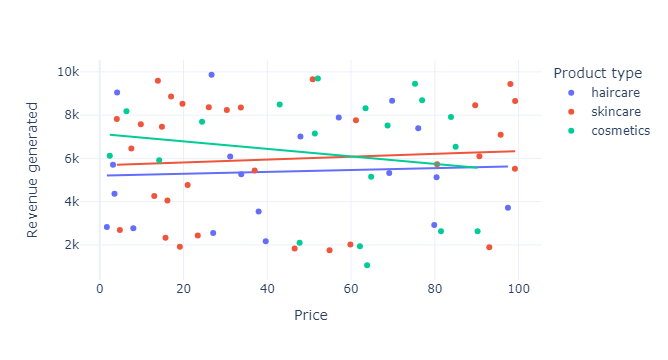

In [112]:
total_revenue=data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig.show()

In [114]:
total_revenue

,Shipping carriers,Revenue generated
0,Carrier A,98801.025591
1,Carrier B,183899.985623
2,Carrier C,121813.673687


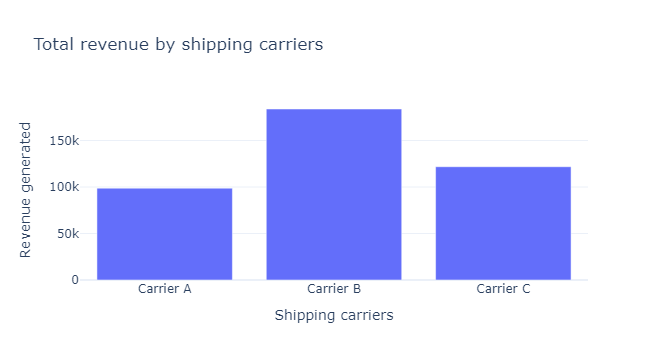

In [116]:
# Create a figure
fig = go.Figure()

fig.add_trace(go.Bar(
    x=total_revenue['Shipping carriers'], 
    y=total_revenue['Revenue generated'],
    
))

# Customize the layout
fig.update_layout(
    title='Total revenue by shipping carriers',
    xaxis_title='Shipping carriers',
    yaxis_title='Revenue generated',
    
)

In [118]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
3,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
4,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237


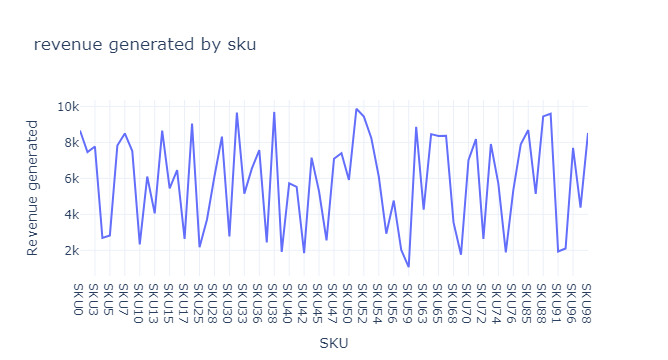

In [120]:
revenue_chart = px.line(data, x='SKU',y='Revenue generated',title='revenue generated by sku')


revenue_chart.show()

In [122]:
print(data.columns)

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')


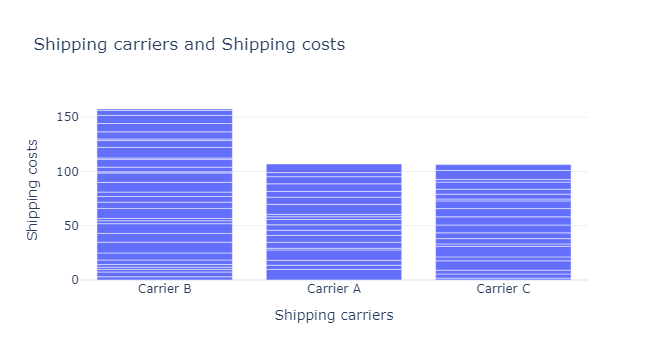

In [124]:
shipping_cost_chart=px.bar(data, 
                   x='Shipping carriers', 
                   y='Shipping costs', 
                   title='Shipping carriers and Shipping costs',
                   )
shipping_cost_chart.show()

In [126]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
3,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
4,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237


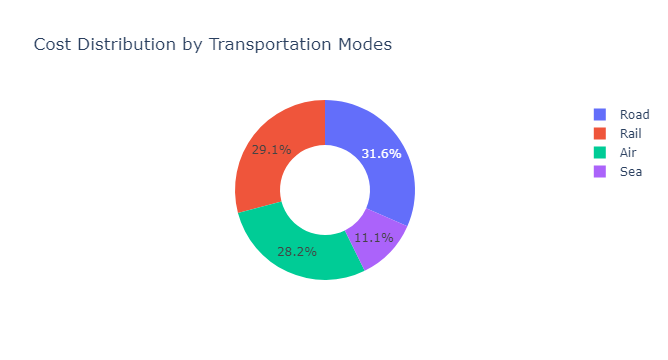

In [130]:
# Create the pie chart
transportation_chart = px.pie(data, 
                              names='Transportation modes', 
                              values='Costs', 
                              title='Cost Distribution by Transportation Modes',
                              hole=0.5,  # Create a donut chart with hole
                              color_discrete_sequence=px.colors.qualitative.Plotly)  # Using Plotly qualitative colors

# Show the chart
transportation_chart.show()

In [132]:
print(data.columns)

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')


In [134]:
defected_rate_by_product=data.groupby('Product type')['Defect rates'].sum().reset_index()

In [136]:
defected_rate_by_product

,Product type,Defect rates
0,cosmetics,37.604806
1,haircare,44.572371
2,skincare,69.901101


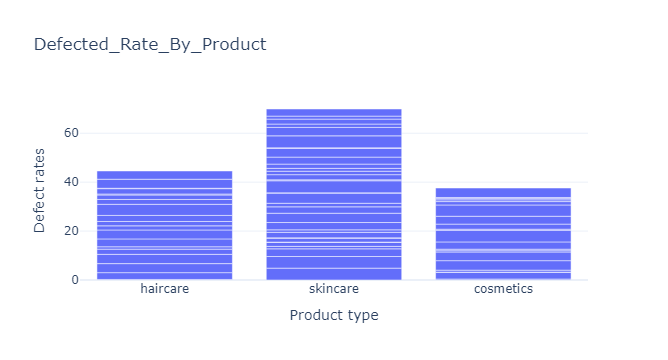

In [138]:
defected_rate_by_product=px.bar(data, 
                   x='Product type', 
                   y='Defect rates', 
                   title='Defected_Rate_By_Product',
                   )
defected_rate_by_product.show()